In [27]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [3]:
df = pd.read_csv(r'C:\Users\sahil\Downloads\language (1).csv')

In [5]:
df

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


vectorizer = CountVectorizer()
data=["I love data analytics", "I love ML"]
vectorized_data = vectorizer.fit_transform(data)
print (vectorizer.get_feature_names_out())
print(vectorized_data.toarray())

In [22]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [23]:
df['language'].value_counts()

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

In [44]:
x = np.array(df['Text'])
y = np.array(df['language'])

In [47]:
cv =  CountVectorizer()
X = cv.fit_transform(x)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state = 42)

In [52]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [54]:
model.score(X_test,y_test)

0.953168044077135

In [57]:
user = input("Enter a text")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a text 私の名前はサヒルです


['Chinese']


In [59]:
predictions = model.predict(X_test)
confidence_scores = model.predict_proba(X_test)
max_confidences = confidence_scores.max(axis=1)  # highest probability for each prediction


In [62]:
user = input("Enter a text")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a text hello


['Latin']


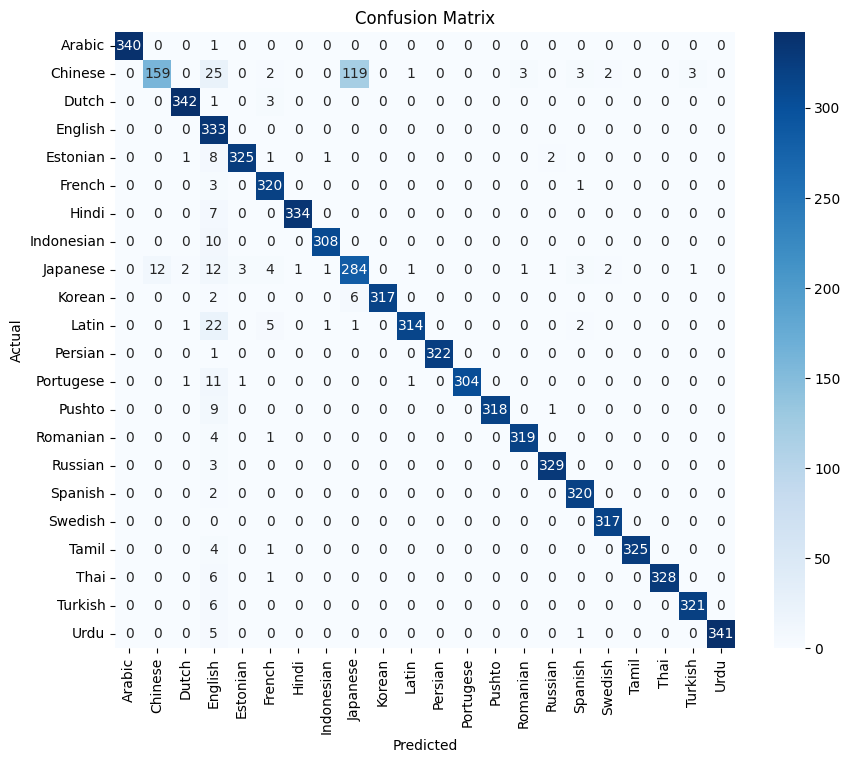

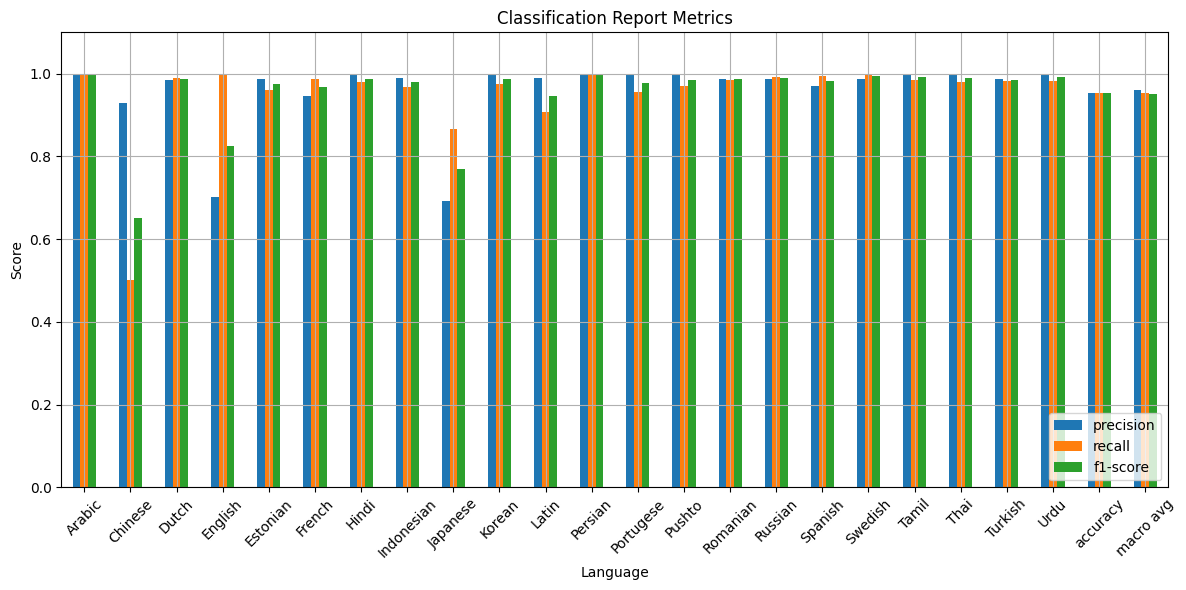


🔍 Overall Accuracy: 0.9532


In [63]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions, labels=model.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

report = classification_report(y_test, predictions, output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df.iloc[:-1, :-1].plot(kind='bar', figsize=(12, 6))
plt.title("Classification Report Metrics")
plt.xlabel("Language")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

accuracy = accuracy_score(y_test, predictions)
print(f"\n🔍 Overall Accuracy: {accuracy:.4f}")
